### Case Study 4 :  Data Science Shark Tank:  Pitch Your Ideas

** Due Date: April 27, 6pm**
<img src="https://cp.inkrefuge.com/images%5Cpressreleases/shark%20tank_large.jpg" width="400px"> 

After the previous 3 case studies,  your team has now equipped with all the three powerful skills of data science: Hacking skill, Business skill and Math skill. In this project, your team is going to make use of these skills to come up with an idea of a new business/startup based upon data science technology. Your goal is to design a better service/solution on any data you like, develop a prototype/demo and prepare a pitch for your idea.
* Your team needs to decide which business problem is important for the market you are joining in (for example, social media market, housing market, search market, etc.).
* Then design a data science approach to improve one of the current services or design a new service on any data that you choose.
* The solution should include all the three components of data science: 1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how much are you evaluating the company; How are you planing to persuade the sharks to invest in your business; 2) the mathematical part to formulate the problem and develop math solution; 3) the programming part to collect the data, implement the math solution, and develop the prototype/demo.


# Background about Elevator Pitch (90 seconds) and Shark Tank

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("mrSmaCo29U4") 

In [2]:
YouTubeVideo("xIq8Sg59UdY") 

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 
* LinkedIn API: https://developer.linkedin.com/docs/rest-api
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition


** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

### Global Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Save .csv file into Pandas Data Frame & HDF5 (Hierarchical Data Format)

In [3]:
csv_path = 'OnlineNewsPopularity.csv'
hdf_path = 'online_news_popularity.h5'

# Read .csv file into data frame
data_frame = pd.read_csv(csv_path, sep=', ', engine='python')

# Rename *channel* columns
data_frame.rename(columns={
        'data_channel_is_lifestyle': 'is_lifestyle',
        'data_channel_is_entertainment': 'is_entertainment',
        'data_channel_is_bus': 'is_business',
        'data_channel_is_socmed': 'is_social_media',
        'data_channel_is_tech': 'is_tech',
        'data_channel_is_world': 'is_world',
    }, inplace=True)

# Rename *weekday* columns
data_frame.rename(columns={
        'weekday_is_monday': 'is_monday',
        'weekday_is_tuesday': 'is_tuesday',
        'weekday_is_wednesday': 'is_wednesday',
        'weekday_is_thursday': 'is_thursday',
        'weekday_is_friday': 'is_friday',
        'weekday_is_saturday': 'is_saturday',
        'weekday_is_sunday': 'is_sunday',
    }, inplace=True)

# Store data into HDF5 file
data_hdf = pd.HDFStore(hdf_path)
data_hdf['data_frame'] = data_frame
data_hdf.close()

### Read HDF5 file into Pandas Data Frame

In [67]:
# Read .h5 file into data frame
data_frame = pd.read_hdf(hdf_path)

data_frame.drop('LDA_00', axis=1, inplace=True)
data_frame.drop('LDA_01', axis=1, inplace=True)
data_frame.drop('LDA_02', axis=1, inplace=True)
data_frame.drop('LDA_03', axis=1, inplace=True)
data_frame.drop('LDA_04', axis=1, inplace=True)
data_frame.drop('kw_min_min', axis=1, inplace=True)
data_frame.drop('kw_max_min', axis=1, inplace=True)
data_frame.drop('kw_avg_min', axis=1, inplace=True)
data_frame.drop('kw_min_max', axis=1, inplace=True)
data_frame.drop('kw_max_max', axis=1, inplace=True)
data_frame.drop('kw_avg_max', axis=1, inplace=True)
data_frame.drop('kw_min_avg', axis=1, inplace=True)
data_frame.drop('kw_max_avg', axis=1, inplace=True)
data_frame.drop('kw_avg_avg', axis=1, inplace=True)
data_frame.drop('n_non_stop_words', axis=1, inplace=True)
data_frame.drop('url', axis=1, inplace=True)

# Print data frame column headers
# print list(data_frame) # Shortest way
list(data_frame.columns.values) # Easy-to-read output

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'is_lifestyle',
 'is_entertainment',
 'is_business',
 'is_social_media',
 'is_tech',
 'is_world',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'is_monday',
 'is_tuesday',
 'is_wednesday',
 'is_thursday',
 'is_friday',
 'is_saturday',
 'is_sunday',
 'is_weekend',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',
 'avg_positive_polarity',
 'min_positive_polarity',
 'max_positive_polarity',
 'avg_negative_polarity',
 'min_negative_polarity',
 'max_negative_polarity',
 'title_subjectivity',
 'title_sentiment_polarity',
 'abs_title_subjectivity',
 'abs_title_sentiment_polarity',
 'shares']

### A brief exploration

In [136]:
#remove outliers if applicable 
data_frame=data_frame[data_frame.shares-data_frame.shares.mean()<=(2*data_frame.shares.std())] #keep only the ones that are within +2 to -2 standard deviations in the column 'Data'.
data_frame

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,buzz_factor,popularity,unpopular,buzz,no_buzz
0,731.0,12.0,219.0,0.663594,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.500000,-0.187500,0.000000,0.187500,593,0.811218,Unpopular,True,No Buzz,True
1,731.0,9.0,255.0,0.604743,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.000000,0.000000,0.500000,0.000000,711,0.972640,Unpopular,True,No Buzz,True
2,731.0,9.0,211.0,0.575130,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.000000,0.000000,0.500000,0.000000,1500,2.051984,Popular,False,No Buzz,True
3,731.0,9.0,531.0,0.503788,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.000000,0.000000,0.500000,0.000000,1200,1.641587,Midly Popular,False,No Buzz,True
4,731.0,13.0,1072.0,0.415646,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.454545,0.136364,0.045455,0.136364,505,0.690834,Unpopular,True,No Buzz,True
5,731.0,10.0,370.0,0.559889,0.698198,2.0,2.0,0.0,0.0,4.359459,...,0.642857,0.214286,0.142857,0.214286,855,1.169631,Unpopular,True,No Buzz,True
6,731.0,8.0,960.0,0.418163,0.549834,21.0,20.0,20.0,0.0,4.654167,...,0.000000,0.000000,0.500000,0.000000,556,0.760602,Unpopular,True,No Buzz,True
7,731.0,12.0,989.0,0.433574,0.572108,20.0,20.0,20.0,0.0,4.617796,...,1.000000,0.500000,0.500000,0.500000,891,1.218878,Unpopular,True,No Buzz,True
8,731.0,11.0,97.0,0.670103,0.836735,2.0,0.0,0.0,0.0,4.855670,...,0.125000,0.000000,0.375000,0.000000,3600,4.924761,Very Popular,False,Some Buzz,False
9,731.0,10.0,231.0,0.636364,0.797101,4.0,1.0,1.0,1.0,5.090909,...,0.000000,0.000000,0.500000,0.000000,710,0.971272,Unpopular,True,No Buzz,True


In [137]:
data_frame.shape

(39130, 50)

In [44]:
# Summary statistics for shares and number of words in the title
data_frame[['shares','n_tokens_title', 'n_tokens_content', 'n_unique_tokens']].describe()

,shares,n_tokens_title,n_tokens_content,n_unique_tokens
count,39644.000000,39644.000000,39644.000000,39644.000000
mean,3395.380184,10.398749,546.514731,0.548216
std,11626.950749,2.114037,471.107508,3.520708
min,1.000000,2.000000,0.000000,0.000000
25%,946.000000,9.000000,246.000000,0.470870
50%,1400.000000,10.000000,409.000000,0.539226
75%,2800.000000,12.000000,716.000000,0.608696
max,843300.000000,23.000000,8474.000000,701.000000


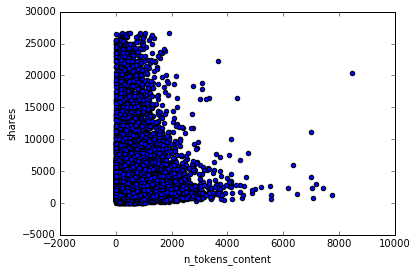

In [138]:
data_frame.plot(kind='scatter', x='n_tokens_content', y='shares')

Added 'buzz_factor' column: "Buzz-Factor" (using shares/day)

In [139]:
buzz_factor=data_frame['shares']/data_frame['timedelta']

Added one 'popularity' column: split # of shares into 4 "popularity" bins:

percentile 0-25%-- "Unpopular"
percentile 25%-50%-- "Mildly Popular"
Percentile 50%-75%--"Popular"
Percentile 75%-100%-- "Very Popular"


In [195]:
popularity=pd.qcut(data_frame['shares'], 4,  labels=["Unpopular","Midly Popular","Popular","Very Popular"])
#popularity=pd.qcut(data_frame2['shares'], 4,  labels=[1,3,6,10])

In [196]:
df=data_frame
df['buzz_factor']=buzz_factor.values
df['popularity']=popularity.values

Similarly, split "buzz factor" into 4 bins:
percentile 0-25%-- "No Buzz" percentile 25%-50%-- "Some Buzz" Percentile 50%-75%--"Buzz" Percentile 75%-100%-- "Lots of Buzz"

In [197]:
buzz=pd.qcut(data_frame['buzz_factor'], 4,  labels=["No Buzz","Some Buzz","Buzz","Lots of Buzz"])
df['buzz']=buzz.values

The real quantity of interest here is, in some sense, the LEAST successful articles.  While it is interesting to predict the level of popularity/buzz factor, what we need (at the very least) to be able to do is predict whether an article will be "unpopular" or generate "no buzz."  Thus we isolate these two bins.

In [198]:
unpopular = df['popularity']== 'Unpopular'
df['unpopular'] = unpopular

no_buzz = df['buzz']=='No Buzz'
df['no_buzz'] = no_buzz

df.shape

(39130, 50)

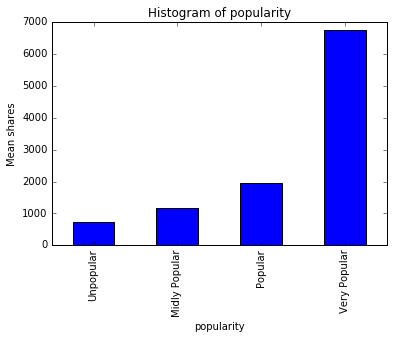

In [199]:
df_popularity=df.pivot_table('shares',index='popularity',aggfunc='mean')

df_popularity.plot(kind='bar')
plt.title('Histogram of popularity')
plt.ylabel('Mean shares')

In [189]:
#Finding correlations
df.corr()['unpopular'].order(ascending=False)

C:\Users\Tyler\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


unpopular                       1.000000
no_buzz                         0.480760
is_world                        0.148772
is_entertainment                0.112153
rate_negative_words             0.069164
n_tokens_title                  0.046171
is_wednesday                    0.043201
is_tuesday                      0.037209
average_token_length            0.029659
is_thursday                     0.026367
global_rate_negative_words      0.025998
min_positive_polarity           0.024668
is_monday                       0.021481
is_business                     0.006448
avg_negative_polarity           0.002025
min_negative_polarity           0.001607
max_negative_polarity           0.000347
abs_title_subjectivity         -0.002345
n_non_stop_unique_tokens       -0.002532
n_unique_tokens                -0.003273
num_videos                     -0.007486
is_friday                      -0.007777
avg_positive_polarity          -0.026161
num_self_hrefs                 -0.034870
title_subjectivi

In [190]:
features = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 
 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'is_lifestyle', 'is_entertainment', 
 'is_business', 'is_social_media', 'is_tech', 'is_world', 'self_reference_min_shares', 'self_reference_max_shares', 
 'self_reference_avg_sharess', 'is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday', 'is_saturday', 
 'is_sunday', 'is_weekend', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 
 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 
 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 
 'abs_title_sentiment_polarity']

In [147]:
from sklearn import preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA 
from sklearn.svm import SVC
import pandas as pd
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.lda import LDA
from sklearn.qda import QDA
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import LinearSVC

## Unpopular Articles

At the very least, we want our software to predict whether an article will be unpopular.  In this case, we define Unpopular as belonging in the bottom 25% in terms of shares amongst articles on a similar platform.

In [191]:
#feature importance
feature_selection_model = ExtraTreesClassifier().fit(df[features], df['unpopular'])
feature_importance=feature_selection_model.feature_importances_
importance_matrix=np.array([features,list(feature_importance)]).T
def sortkey(s):
    return s[1]
sort=zip(features,list(feature_importance))
f=pd.DataFrame(sorted(sort,key=sortkey,reverse=True),columns=['variables','importance'])[:10]
f

,variables,importance
0,timedelta,0.039309
1,num_keywords,0.033998
2,n_tokens_title,0.032742
3,global_subjectivity,0.031746
4,self_reference_min_shares,0.031583
5,n_non_stop_unique_tokens,0.031398
6,num_hrefs,0.031117
7,n_unique_tokens,0.031054
8,global_rate_positive_words,0.030868
9,global_sentiment_polarity,0.030466


In [201]:
features2=f['variables']

#split data into two parts
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(df[features2], df.unpopular, test_size=0.4, random_state=None)
x_train.shape

(23478, 10)

In [150]:
from sklearn import cross_validation, metrics
from sklearn.naive_bayes import BernoulliNB
from time import time

In [202]:
# Decision Tree accuracy and time elapsed caculation
t0=time()
print "DecisionTree"
dt = DecisionTreeClassifier(min_samples_split=25,random_state=1)
clf_dt=dt.fit(x_train,y_train)
y_predicted = clf_dt.predict(x_test)
print(metrics.classification_report(y_test, y_predicted))
t1=time()
print "time elapsed: ", t1-t0

DecisionTree
             precision    recall  f1-score   support

      False       0.77      0.82      0.79     11745
       True       0.33      0.27      0.29      3907

avg / total       0.66      0.68      0.67     15652

time elapsed:  0.594000101089


In [203]:
# Random Forest accuracy and time elapsed caculation
t2=time()
print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=1)
clf_rf = rf.fit(x_train,y_train)
print "Acurracy: ", clf_rf.score(x_test,y_test)
t3=time()
print "time elapsed: ", t3-t2

RandomForest
Acurracy:  0.750383337593
time elapsed:  11.7650001049


In [84]:
# support vector classifier 
print 'LinearSVC'
svc=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=10000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=1)
clf_svc=svc.fit(x_train,y_train)
print "Acurracy: ", clf_svc.score(x_test,y_test)

LinearSVC
[LibLinear]Acurracy:  0.7446714592


C:\Users\Tyler\AppData\Local\Enthought\Canopy\User\lib\site-packages\sklearn\svm\base.py:924: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


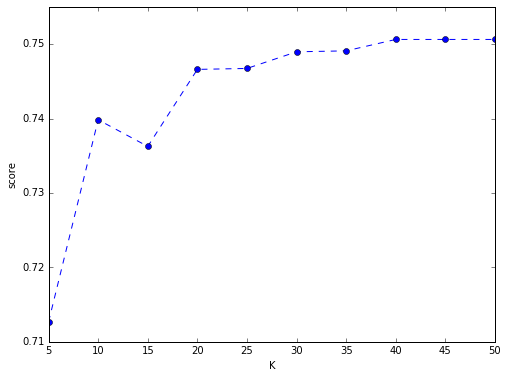

In [204]:
from sklearn.neighbors import KNeighborsClassifier

# We use K-values ranging from 1-10
k=[5,10,15,20,25,30,35,40,45,50]

# Train a model on the trainng set and use that model to predict on the testing set
predicted_knn=[KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train).predict(x_test) for i in k]

#Compute accuracy on the testing set for each value of k
score_knn=[metrics.accuracy_score(predicted_knn[i],y_test) for i in range(10)]

# Plot accuracy on the test set vs. k
fig=plt.figure(figsize=(8,6))
plt.plot([5,10,15,20,25,30,35,40,45,50], score_knn, 'bo--',label='knn')
plt.xlabel('K')
plt.ylabel('score')

[[11571   174]
 [ 3729   178]]


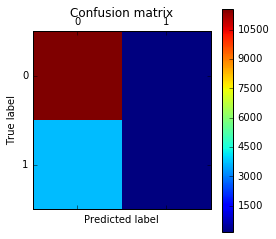

In [205]:
# Make predictions based on the best model above
y_predicted = predicted_knn[9]

# Print and plot a confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Articles with no Buzz

At the very least, we want our software to predict whether an article will generate no "buzz". In this case, we define "no buzz" as belonging in the bottom 25% in terms of shares per day amongst articles published on a similar platform.

In [156]:
features1 = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_unique_tokens', 'num_hrefs', 
 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'is_lifestyle', 'is_entertainment', 
 'is_business', 'is_social_media', 'is_tech', 'is_world', 'self_reference_min_shares', 'self_reference_max_shares', 
 'self_reference_avg_sharess', 'is_monday', 'is_tuesday', 'is_wednesday', 'is_thursday', 'is_friday', 'is_saturday', 
 'is_sunday', 'is_weekend', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 
 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 
 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 
 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 
 'abs_title_sentiment_polarity']

In [157]:
#feature importance
feature_selection_model = ExtraTreesClassifier().fit(df[features1], df['no_buzz'])
feature_importance=feature_selection_model.feature_importances_
importance_matrix=np.array([features,list(feature_importance)]).T
def sortkey(s):
    return s[1]
sort=zip(features,list(feature_importance))
f_b=pd.DataFrame(sorted(sort,key=sortkey,reverse=True),columns=['variables','importance'])[:10]
f_b

,variables,importance
0,timedelta,0.037948
1,n_unique_tokens,0.037016
2,n_tokens_content,0.036434
3,num_hrefs,0.035693
4,n_tokens_title,0.035572
5,num_videos,0.035510
6,global_sentiment_polarity,0.034523
7,is_weekend,0.034132
8,num_self_hrefs,0.034099
9,average_token_length,0.033824


In [158]:
features_b=f_b['variables']

#split data into two parts
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(df[features_b], df.no_buzz, test_size=0.4, random_state=None)
x_train.shape

(23478, 10)

In [159]:
# Decision Tree accuracy and time elapsed caculation
t0=time()
print "DecisionTree"
dt = DecisionTreeClassifier(min_samples_split=25,random_state=1)
clf_dt=dt.fit(x_train,y_train)
y_predicted = clf_dt.predict(x_test)
print(metrics.classification_report(y_test, y_predicted))
t1=time()
print "time elapsed: ", t1-t0

DecisionTree
             precision    recall  f1-score   support

      False       0.84      0.85      0.84     11796
       True       0.52      0.50      0.51      3856

avg / total       0.76      0.76      0.76     15652

time elapsed:  0.463000059128


In [160]:
# Random Forest accuracy and time elapsed caculation
t2=time()
print "RandomForest"
rf = RandomForestClassifier(n_estimators=100,n_jobs=1)
clf_rf = rf.fit(x_train,y_train)
print "Acurracy: ", clf_rf.score(x_test,y_test)
t3=time()
print "time elapsed: ", t3-t2

RandomForest
Acurracy:  0.796128290314
time elapsed:  12.129999876


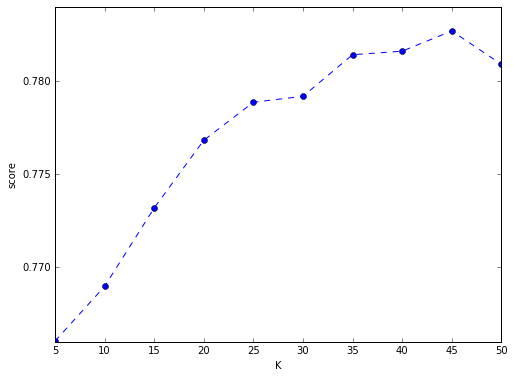

In [161]:
from sklearn.neighbors import KNeighborsClassifier

# We use K-values ranging from 5-50
k=[5,10,15,20,25,30,35,40,45,50]

# Train a model on the trainng set and use that model to predict on the testing set
predicted_knn=[KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train).predict(x_test) for i in k]

#Compute accuracy on the testing set for each value of k
score_knn=[metrics.accuracy_score(predicted_knn[i],y_test) for i in range(10)]

# Plot accuracy on the test set vs. k
fig=plt.figure(figsize=(8,6))
plt.plot([5,10,15,20,25,30,35,40,45,50], score_knn, 'bo--',label='knn')
plt.xlabel('K')
plt.ylabel('score')

[[10113  1683]
 [ 1718  2138]]


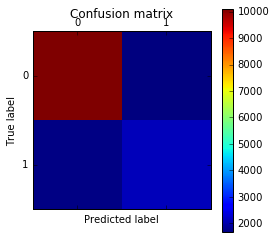

In [162]:
# Make predictions based on the best model above
y_predicted = predicted_knn[8]

# Print and plot a confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Further Analysis

Here we try to use PCA to improve our results.

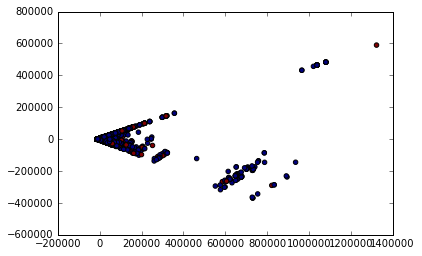

In [180]:
from sklearn.decomposition import PCA
pca = PCA(4)
plot_columns = pca.fit_transform(df[features1])
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=df['unpopular'])
plt.show()

In [181]:
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(plot_columns, df.buzz_factor, test_size=0.4, random_state=None)
x_train.shape

(23478L, 4L)

In [182]:
#linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(x_train, y_train)
from sklearn.metrics import mean_squared_error
predictions = model.predict(x_test)
mean_squared_error(predictions, y_test)

2445.0356821514774

In [178]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=60, min_samples_leaf=10, random_state=1)
model2.fit(x_train, y_train)
predictions = model2.predict(x_test)
mean_squared_error(predictions, y_test)

2315.0392235171598

*------------------------

### Problem 4: Prepare a 90 second Pitch and *present* it in the class (20 points)

* Prepare the slide(s) for the Pitch (10 points)
* Present it in the class (10 points).

*Advice:  It should really only be one or two slides, but a really good one or two slides!  Also, it is ok to select one person on the team to give the 90 second pitch (though a very organized multi-person 90 second pitch can be very impressive!) *



# Report: communicate the results (20 points)

(1) (5 points) What is your business proposition?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: **NOTE, for this Case Study you need to prepare two (2) PPT files!**  One for the 90 second Pitch and one for a normal 10 minute presentation.

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.

     (please include figures or tables in the report, but no source code)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Send an email to rcpaffenroth@wpi.edu with the subject: "[DS501] Case study 4".